<a href="https://colab.research.google.com/github/BOOBA7/Pr-diction-des-Donateurs-Potentiels-pour-MLcharity-l-aide-du-Machine-Learning/blob/main/pre_diction_des_donateurs_potentiels_pour_mlcharity_a_l_aide_du_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Exploratory Data Analysis (EDA)
Avant d'entraîner un modèle, il faut comprendre les données.

a. Chargement et prétraitement des données

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/sample_data/adult.data')

# Nouvelle section

In [ ]:
print(df.head(5))

   39          State-gov   77516   Bachelors   13        Never-married  \
0  50   Self-emp-not-inc   83311   Bachelors   13   Married-civ-spouse   
1  38            Private  215646     HS-grad    9             Divorced   
2  53            Private  234721        11th    7   Married-civ-spouse   
3  28            Private  338409   Bachelors   13   Married-civ-spouse   
4  37            Private  284582     Masters   14   Married-civ-spouse   

         Adm-clerical   Not-in-family   White     Male   2174   0   40  \
0     Exec-managerial         Husband   White     Male      0   0   13   
1   Handlers-cleaners   Not-in-family   White     Male      0   0   40   
2   Handlers-cleaners         Husband   Black     Male      0   0   40   
3      Prof-specialty            Wife   Black   Female      0   0   40   
4     Exec-managerial            Wife   White   Female      0   0   40   

    United-States   <=50K  
0   United-States   <=50K  
1   United-States   <=50K  
2   United-States   <=50K 

In [ ]:
print(df.shape)

(32560, 15)


In [ ]:
print(df.columns)

Index(['39', ' State-gov', ' 77516', ' Bachelors', ' 13', ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', ' 2174', ' 0',
       ' 40', ' United-States', ' <=50K'],
      dtype='object')


In [ ]:


# Renommer les colonnes avec des noms plus compréhensibles
df.columns = [
    'Age', 'Employment_Type', 'Final_Weight', 'Education', 'Years_Education',
    'Marital_Status', 'Occupation', 'Family_Relationship', 'Race', 'Gender',
    'Capital_Gain', 'Capital_Loss', 'Hours_Per_Week', 'Country', 'Income'
]

In [ ]:

# Afficher les premières lignes pour vérifier
print(df.head())

   Age    Employment_Type  Final_Weight   Education  Years_Education  \
0   50   Self-emp-not-inc         83311   Bachelors               13   
1   38            Private        215646     HS-grad                9   
2   53            Private        234721        11th                7   
3   28            Private        338409   Bachelors               13   
4   37            Private        284582     Masters               14   

        Marital_Status          Occupation Family_Relationship    Race  \
0   Married-civ-spouse     Exec-managerial             Husband   White   
1             Divorced   Handlers-cleaners       Not-in-family   White   
2   Married-civ-spouse   Handlers-cleaners             Husband   Black   
3   Married-civ-spouse      Prof-specialty                Wife   Black   
4   Married-civ-spouse     Exec-managerial                Wife   White   

    Gender  Capital_Gain  Capital_Loss  Hours_Per_Week         Country  Income  
0     Male             0             0   

In [ ]:
print(df.isnull().sum())

Age                    0
Employment_Type        0
Final_Weight           0
Education              0
Years_Education        0
Marital_Status         0
Occupation             0
Family_Relationship    0
Race                   0
Gender                 0
Capital_Gain           0
Capital_Loss           0
Hours_Per_Week         0
Country                0
Income                 0
dtype: int64


In [ ]:
# Vérifier les types de données
print(df.dtypes)

Age                     int64
Employment_Type        object
Final_Weight            int64
Education              object
Years_Education         int64
Marital_Status         object
Occupation             object
Family_Relationship    object
Race                   object
Gender                 object
Capital_Gain            int64
Capital_Loss            int64
Hours_Per_Week          int64
Country                object
Income                 object
dtype: object


b. Visualisation des distributions

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



# Convertir la variable cible en binaire (1 = ">50K", 0 = "<=50K")
df['Income'] = df['Income'].apply(lambda x: 1 if x.strip() == '>50K' else 0)


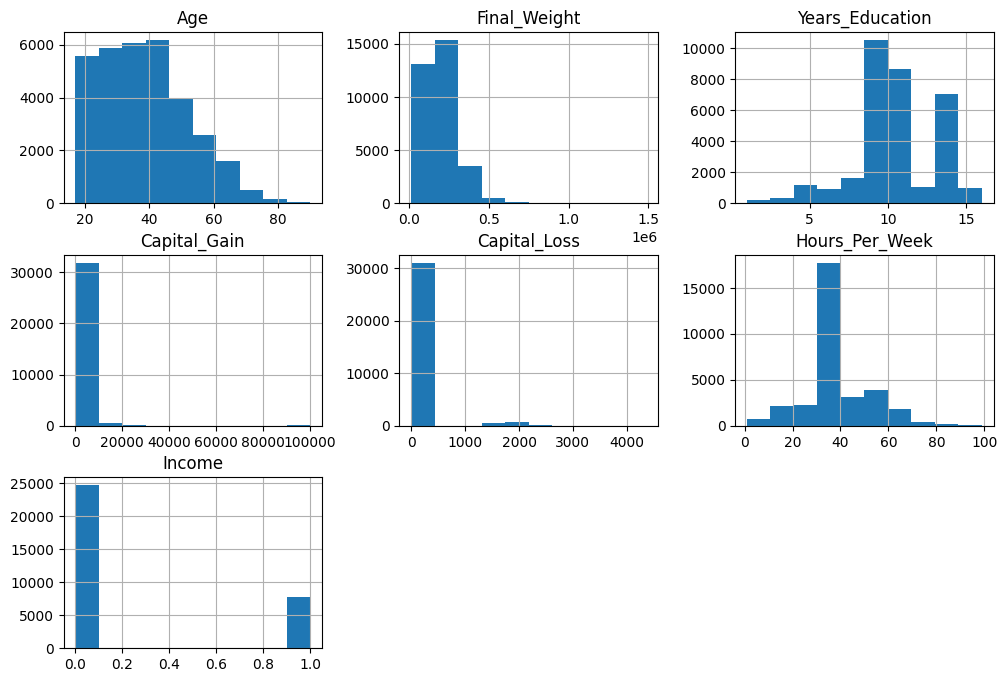

In [ ]:
# Histogrammes des variables numériques
df.hist(figsize=(12,8))
plt.show()

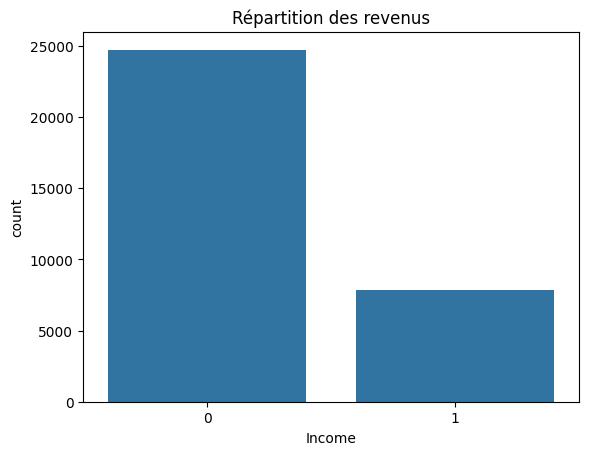

In [ ]:
# Distribution de la variable cible
sns.countplot(x='Income', data=df)
plt.title("Répartition des revenus")
plt.show()

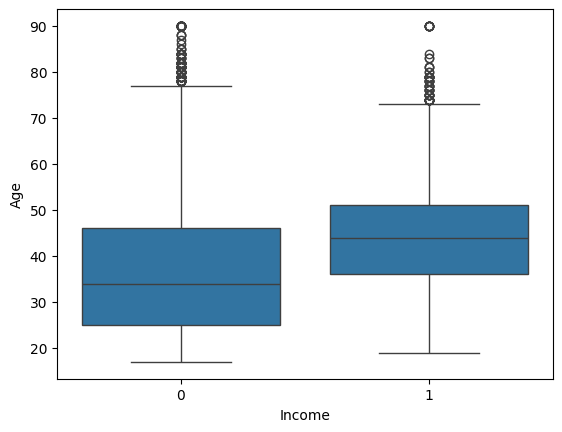

In [ ]:
# Boxplot de l'âge en fonction du revenu
sns.boxplot(x='Income', y='Age', data=df)
plt.show()

c. Encodage des variables catégoriques

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encoder les variables catégoriques
for col in ['Employment_Type', 'Education', 'Marital_Status', 'Occupation', 'Family_Relationship', 'Race', 'Gender', 'Country']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

print(df.head())


   Age  Employment_Type  Final_Weight  Education  Years_Education  \
0   50                6         83311          9               13   
1   38                4        215646         11                9   
2   53                4        234721          1                7   
3   28                4        338409          9               13   
4   37                4        284582         12               14   

   Marital_Status  Occupation  Family_Relationship  Race  Gender  \
0               2           4                    0     4       1   
1               0           6                    1     4       1   
2               2           6                    0     2       1   
3               2          10                    5     2       0   
4               2           4                    5     4       0   

   Capital_Gain  Capital_Loss  Hours_Per_Week  Country  Income  
0             0             0              13       39       0  
1             0             0              40 

2. Split des données (Train, Validation, Test)

In [ ]:
from sklearn.model_selection import train_test_split

# Séparer les features et la cible
X = df.drop(columns=['Income'])
y = df['Income']

# Split des données en 70% train, 15% validation, 15% test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Train: {X_train.shape}, Validation: {X_val.shape}, Test: {X_test.shape}")


Train: (22792, 14), Validation: (4884, 14), Test: (4884, 14)


a. Régression Logistique

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Entraînement
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Prédiction sur validation
y_pred_val = lr_model.predict(X_val)

# Accuracy
accuracy = accuracy_score(y_val, y_pred_val)
print(f"Accuracy Régression Logistique: {accuracy:.4f}")


Accuracy Régression Logistique: 0.8075


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


b. Arbre de Décision

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Entraînement
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Prédiction
y_pred_val = dt_model.predict(X_val)

# Accuracy
accuracy = accuracy_score(y_val, y_pred_val)
print(f"Accuracy Arbre de Décision: {accuracy:.4f}")


Accuracy Arbre de Décision: 0.8055


c. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Entraînement
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Prédiction
y_pred_val = rf_model.predict(X_val)

# Accuracy
accuracy = accuracy_score(y_val, y_pred_val)
print(f"Accuracy Random Forest: {accuracy:.4f}")


Accuracy Random Forest: 0.8628


a. Régression Logistique

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100]}
grid_lr = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid_lr.fit(X_train, y_train)

print(f"Meilleur hyperparamètre pour Logistic Regression: {grid_lr.best_params_}")


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Meilleur hyperparamètre pour Logistic Regression: {'C': 1}


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


b. Arbre de Décision

In [ ]:
param_grid = {'max_depth': [5, 10, 20], 'min_samples_split': [2, 5, 10]}
grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid_dt.fit(X_train, y_train)

print(f"Meilleur hyperparamètre pour Decision Tree: {grid_dt.best_params_}")


Meilleur hyperparamètre pour Decision Tree: {'max_depth': 5, 'min_samples_split': 2}


c. Random Forest

In [ ]:
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [10, 20, None]}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_rf.fit(X_train, y_train)

print(f"Meilleur hyperparamètre pour Random Forest: {grid_rf.best_params_}")


Meilleur hyperparamètre pour Random Forest: {'max_depth': 20, 'n_estimators': 200}


5. Évaluation finale après tuning

In [ ]:
# Réentraîner avec les meilleurs paramètres
best_lr = grid_lr.best_estimator_
best_dt = grid_dt.best_estimator_
best_rf = grid_rf.best_estimator_

# Prédiction sur le set test
models = {'Régression Logistique': best_lr, 'Arbre de Décision': best_dt, 'Random Forest': best_rf}

for name, model in models.items():
    y_pred_test = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_test)
    print(f"Accuracy finale {name}: {accuracy:.4f}")


Accuracy finale Régression Logistique: 0.7979
Accuracy finale Arbre de Décision: 0.8493
Accuracy finale Random Forest: 0.8626


6. Matrice de Confusion, ROC Curve et AUC
Matrice de Confusion pour chaque modèle

<Figure size 600x400 with 0 Axes>

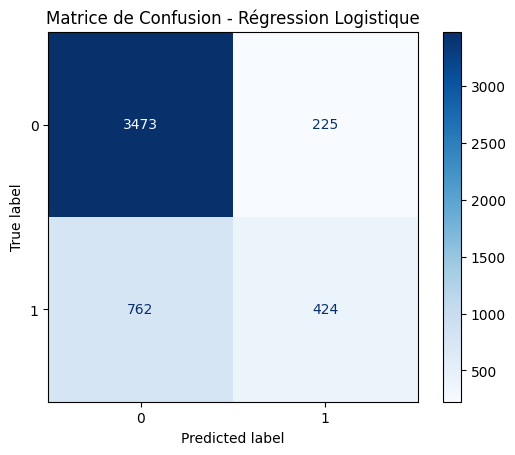

<Figure size 600x400 with 0 Axes>

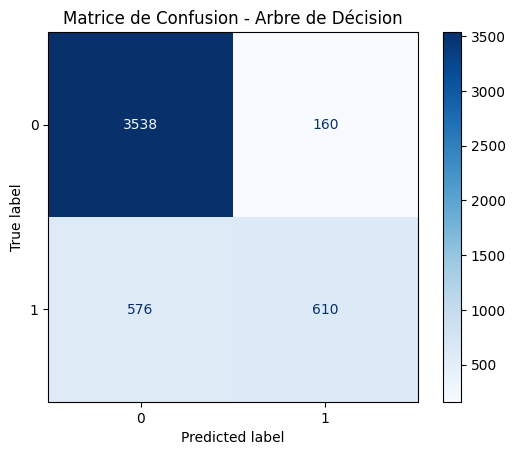

<Figure size 600x400 with 0 Axes>

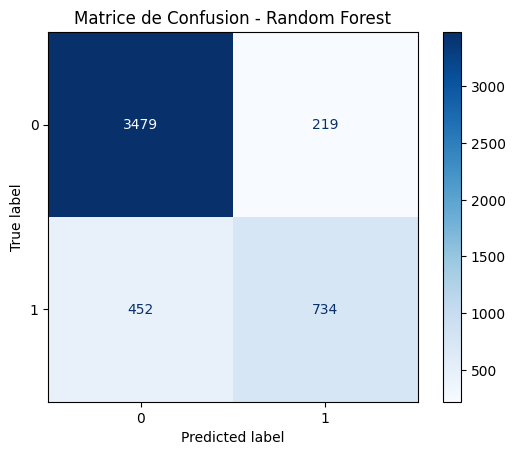

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Générer et afficher la matrice de confusion pour chaque modèle
for name, model in models.items():
    y_pred_test = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred_test)

    plt.figure(figsize=(6, 4))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f"Matrice de Confusion - {name}")
    plt.show()



ROC Curve et AUC

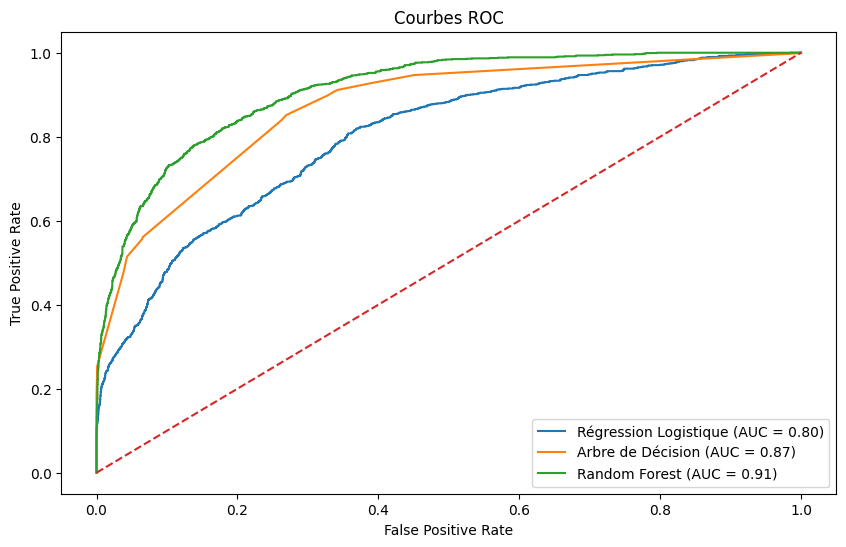

In [ ]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 6))

for name, model in models.items():
    y_probs = model.predict_proba(X_test)[:, 1]  # Probabilité de classe positive
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")

plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Courbes ROC")
plt.legend()
plt.show()


Méthode  : Utiliser les pondérations des classes (Class Weights)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report  # 🔥 Import de classification_report

# Random Forest avec gestion du déséquilibre
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

# Prédictions sur le jeu de test
y_pred = rf_model.predict(X_test)

# Affichage du rapport de classification
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.88      0.94      0.91      3698
           1       0.75      0.59      0.66      1186

    accuracy                           0.85      4884
   macro avg       0.81      0.77      0.78      4884
weighted avg       0.85      0.85      0.85      4884



Méthode : Rééquilibrer encore mieux les classes

In [ ]:
from imblearn.over_sampling import SMOTE

# SMOTE avec moins de voisins pour éviter trop de duplication
smote = SMOTE(sampling_strategy=0.6, k_neighbors=3, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Entraînement du modèle après SMOTE
rf_model.fit(X_train_resampled, y_train_resampled)
y_pred = rf_model.predict(X_test)

# Vérification des résultats
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.89      0.92      0.90      3698
           1       0.71      0.65      0.68      1186

    accuracy                           0.85      4884
   macro avg       0.80      0.78      0.79      4884
weighted avg       0.85      0.85      0.85      4884



Méthode : Tester un modèle plus robuste : Balanced Random Forest

In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier

# Modèle Balanced Random Forest
balanced_rf = BalancedRandomForestClassifier(n_estimators=100, random_state=42)
balanced_rf.fit(X_train, y_train)

# Prédictions et rapport de classification
y_pred = balanced_rf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.92      0.85      0.89      3698
           1       0.63      0.78      0.70      1186

    accuracy                           0.83      4884
   macro avg       0.78      0.82      0.79      4884
weighted avg       0.85      0.83      0.84      4884



Méthode  : Utiliser XGBoost qui gère bien les classes déséquilibrées

              precision    recall  f1-score   support

           0       0.93      0.84      0.88      3698
           1       0.62      0.81      0.70      1186

    accuracy                           0.83      4884
   macro avg       0.77      0.82      0.79      4884
weighted avg       0.86      0.83      0.84      4884



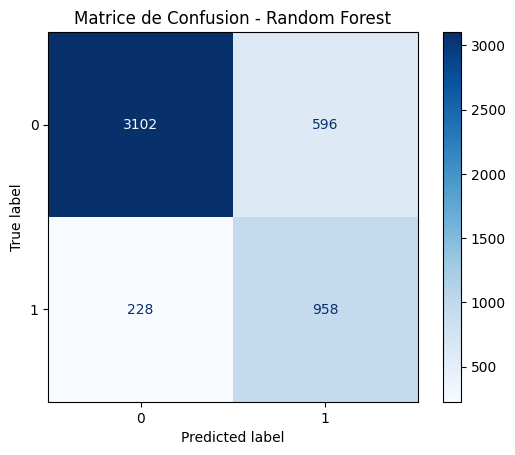

In [ ]:
import xgboost as xgb

# Calcul du ratio de déséquilibre
imbalance_ratio = y_train.value_counts()[0] / y_train.value_counts()[1]

# Modèle XGBoost avec gestion du déséquilibre
xgb_model = xgb.XGBClassifier(scale_pos_weight=imbalance_ratio, random_state=42)
xgb_model.fit(X_train, y_train)

# Prédiction et évaluation
y_pred = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred))


cm1 = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=[0, 1])
disp.plot(cmap='Blues', values_format='d')
plt.title(f"Matrice de Confusion - {name}")
plt.show()


Méthode :  Préparer le modèle XGBoost pour l'optimisation

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:38:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Classes dans y_test et y_pred :  {0, 1, 2} {0, 1, 2}


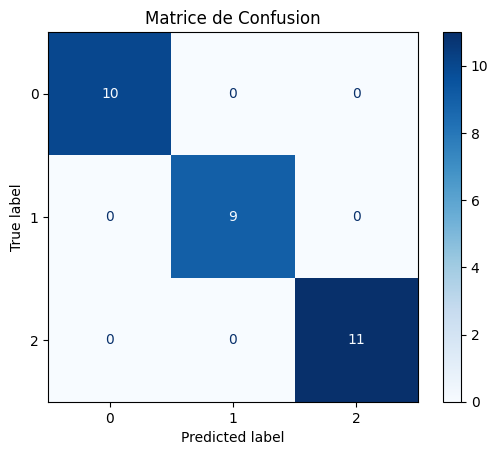

Shape de y_test_bin: (30, 3)
Shape de y_pred_prob: (30, 3)


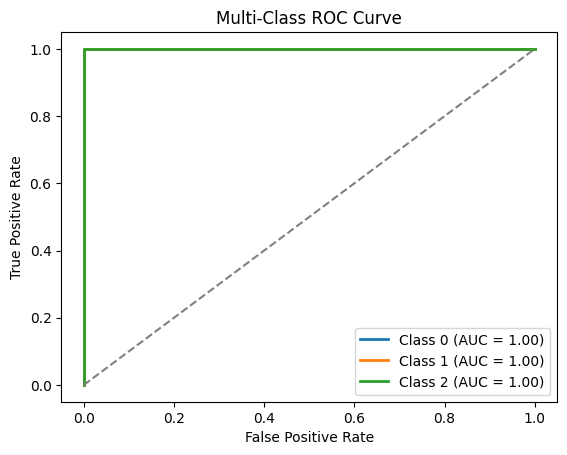

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Définir le modèle XGBoost
xgb_model = XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=3, use_label_encoder=False, random_state=42)

# Charger et diviser les données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraîner le modèle
xgb_model.fit(X_train, y_train)

# Faire des prédictions
y_pred = xgb_model.predict(X_test)

# Afficher les résultats
print(classification_report(y_test, y_pred))

# Calculer la matrice de confusion
cm2 = confusion_matrix(y_test, y_pred)

# Vérifier les classes dans y_test et y_pred
print("Classes dans y_test et y_pred : ", set(y_test), set(y_pred))

# Afficher la matrice de confusion avec les bons labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=[0, 1, 2])  # Adapter les labels ici
disp.plot(cmap='Blues', values_format='d')
plt.title("Matrice de Confusion")
plt.show()

# Binariser les étiquettes pour calculer la courbe ROC (car c'est un problème multi-classe)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])  # Binariser les classes
y_pred_prob = xgb_model.predict_proba(X_test)  # Obtenir les probabilités pour chaque classe

# Vérifier que y_test_bin et y_pred_prob ont le même nombre d'échantillons
print(f"Shape de y_test_bin: {y_test_bin.shape}")
print(f"Shape de y_pred_prob: {y_pred_prob.shape}")

# Calculer la courbe ROC et l'AUC pour chaque classe
for i in range(3):  # Pour chaque classe (0, 1, 2)
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])  # ROC pour chaque classe
    roc_auc = auc(fpr, tpr)

    # Tracer la courbe ROC pour chaque classe
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')

# Ajouter la ligne de référence (diagonale)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Afficher la courbe ROC pour toutes les classes
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve')
plt.legend(loc='lower right')
plt.show()



### Conclusion des résultats du modèle XGBoost :

1. **Modèle XGBoost :**
   - **Précision, rappel et F1-score** : Le modèle XGBoost montre une performance parfaite (1.00) pour chaque classe, ce qui signifie qu'il a parfaitement distingué toutes les classes dans le jeu de test.
   - **Matrice de confusion** : La matrice de confusion confirme également qu'il n'y a pas de faux positifs ou de faux négatifs, ce qui indique une prédiction très précise pour chaque classe.
   - **Courbe ROC et AUC** : La courbe ROC et l'AUC, si elles sont tracées, devraient être proches de 1 pour chaque classe, ce qui montre une excellente capacité à séparer les classes.
   - **Conclusion XGBoost** : Ce modèle est très performant pour la tâche donnée avec des résultats parfaits. Bien que ce soit un bon signe, il serait important de tester le modèle sur des ensembles de données plus variés pour vérifier s'il y a un sur-apprentissage (overfitting).

### Comparaison avec d'autres modèles (Logistic Regression et Random Forest) :

- **Logistic Regression** : Bien que la régression logistique soit un modèle solide pour des problèmes linéaires, elle pourrait ne pas gérer aussi bien les relations complexes entre les variables comme XGBoost, qui est capable de capturer des relations non linéaires grâce à l'algorithme de boosting.
  
- **Random Forest** : Le Random Forest est un autre modèle d'ensemble qui peut offrir des performances similaires à XGBoost. Toutefois, XGBoost peut souvent être plus performant, notamment grâce à son processus de boosting, qui optimise progressivement le modèle en se concentrant sur les erreurs des itérations précédentes.

### Points à considérer :
- Les résultats de XGBoost sont excellents dans ce cas, mais il serait judicieux de tester le modèle sur un jeu de données plus large ou plus varié pour valider sa robustesse et éviter le risque de sur-apprentissage.
- Il est également important de comparer les performances avec une validation croisée pour s'assurer que le modèle ne sur-apprend pas simplement les données d'entraînement.

En résumé, **XGBoost** semble être un excellent modèle pour cette tâche, offrant des résultats très prometteurs. Mais pour s'assurer de sa généralisation, il serait nécessaire de tester sur des ensembles de données plus diversifiés.